### Orthogonal Polynomial Encoding:
If levels, `k = 4` then The coefficients taken on by polynomial are the `linear, quadratic, and cubic` trends in the categorical variable. Here categorical variables are assumed to be represented as equally spaced orderd variable. That is why this encoding is performed only for ordered equally space variables. In general, the polynomial contrast produces polynomials of order k-1.
https://www.statsmodels.org/dev/contrasts.html#orthogonal-polynomial-coding

In [107]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [108]:
car_data = pd.read_csv('datasets/auto-mpg.csv', na_values='?')

car_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
81,28.0,4,97.0,92.0,2288,17.0,72,3,datsun 510 (sw)
185,26.0,4,98.0,79.0,2255,17.7,76,1,dodge colt
146,28.0,4,90.0,75.0,2125,14.5,74,1,dodge colt
85,13.0,8,350.0,175.0,4100,13.0,73,1,buick century 350
318,29.8,4,134.0,90.0,2711,15.5,80,3,toyota corona liftback
372,27.0,4,151.0,90.0,2735,18.0,82,1,pontiac phoenix
203,29.5,4,97.0,71.0,1825,12.2,76,2,volkswagen rabbit
138,14.0,8,318.0,150.0,4457,13.5,74,1,dodge coronet custom (sw)
361,25.4,6,168.0,116.0,2900,12.6,81,3,toyota cressida
52,30.0,4,88.0,76.0,2065,14.5,71,2,fiat 124b


In [109]:
car_data = car_data[['mpg', 'horsepower']]

car_data.dropna(inplace=True)

car_data.reset_index(inplace=True, drop=True)

car_data.sample(10)

,mpg,horsepower
52,31.0,65.0
328,33.8,67.0
389,32.0,84.0
390,28.0,79.0
102,11.0,150.0
237,30.0,67.0
46,19.0,100.0
38,14.0,175.0
310,37.2,65.0
378,32.0,67.0


In [110]:
car_data.corr()

,mpg,horsepower
mpg,1.000000,-0.778427
horsepower,-0.778427,1.000000


#### Visualize the correlations in a heatmap
Mpg and horsepower are closely correlated

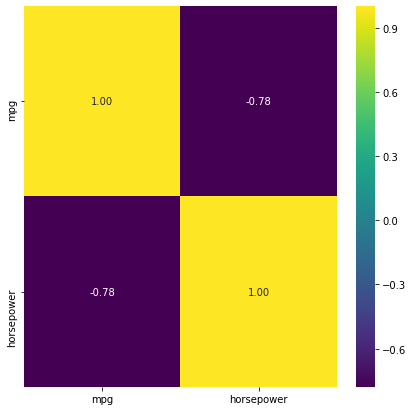

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))  

ax = sns.heatmap(car_data.corr(), 
                 annot=True, 
                 fmt='.2f', 
                 cmap='viridis')

plt.show()

### Creating an ordered categorical from `read`.

In [112]:
_, bin_edges = np.histogram(car_data['horsepower'], 3)

### Points of bins

In [113]:
bin_edges

array([ 46.        , 107.33333333, 168.66666667, 230.        ])

### Assigning numercical values to the bins
https://docs.scipy.org/doc/numpy/reference/generated/numpy.digitize.html

In [114]:
hp_cat = np.digitize(car_data['horsepower'], bin_edges, True)

In [115]:
hp_cat[:100]

array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 2, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2,
       3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1])

In [116]:
hp_cat.shape

(392,)

### Adding the column to the dataframe

In [117]:
car_data['hp_cat'] = hp_cat

car_data.sample(5)

,mpg,horsepower,hp_cat
244,32.8,52.0,1
285,16.5,138.0,2
104,13.0,170.0,3
330,32.7,132.0,2
215,30.0,80.0,1


In [118]:
car_data.drop(columns=['horsepower'], inplace=True)

### Grouping by  `hp_cat`  and evaluating the mean of each group

In [119]:
car_data_grouped = car_data.groupby('hp_cat')

car_data_grouped.head()

,mpg,hp_cat
0,18.0,2
1,15.0,2
2,18.0,2
3,16.0,2
4,17.0,2
5,15.0,3
6,14.0,3
7,14.0,3
8,14.0,3
9,15.0,3


In [120]:
car_data_grouped.mean()

,mpg
hp_cat,
0,26.000000
1,27.186275
2,17.289320
3,13.296875


In [121]:
car_data_grouped.mean().mean()

mpg    20.943117
dtype: float64

### Getting the unique values in the `hp_cat` column 

In [122]:
car_data.hp_cat.unique()

array([2, 3, 1, 0])

### Note:
<B> Here levels, `K = 4`. The coefficients taken on by polynomial coding for `k=4` levels are the `linear`, `quadratic`, and `cubic` trends in the categorical variable </B>

### Creating and fitting the model

In [123]:
mod = ols("mpg ~ C(hp_cat, Poly)",
          data=car_data)

result = mod.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           1.80e-50
Time:                        11:23:47   Log-Likelihood:                -1243.1
No. Observations:                 392   AIC:                             2494.
Df Residuals:                     388   BIC:                             2510.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    20.9431      1.070     19.577      0.000      18.840      23.046
C(hp_cat, Poly).Linear      -10.7345      2.838     -3.782      0.000     -16.315      -5.154
C(hp_cat, Poly).Quadratic    -2.5894      2.140     -1.210      0.227      -6.796       1.617
C(hp_cat, Poly).Cubic         3.7986      1.048      3.624      0.000       1.738       5.859
==============================================================================
Omnibus:                       15.471   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.178
Skew:                           0.480   Prob(JB):                     0.000307
Kurtosis:                       3.266   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### It can be observed that, `hp_cat` has a significant linear effect on the dependent variable `displacement` but not a significant quadratic or cubic effect.

In [124]:
print('Parameters: ', result.params)
print('\nR2 Score: ', result.rsquared)

Parameters:  Intercept                    20.943117
C(hp_cat, Poly).Linear      -10.734542
C(hp_cat, Poly).Quadratic    -2.589360
C(hp_cat, Poly).Cubic         3.798574
dtype: float64

R2 Score:  0.4526112147657164


### Importing `Poly` from `Patsy`

In [125]:
from patsy.contrasts import Poly

### Getting the unique values in the `read_cat` column and printing the values as a list

In [126]:
levels = [0, 1, 2, 3]

levels

[0, 1, 2, 3]

#### Making a contrast matrix

In [127]:
contrast_with_int = Poly().code_with_intercept(levels)
contrast_with_int

ContrastMatrix(array([[ 1.        , -0.67082039,  0.5       , -0.2236068 ],
                      [ 1.        , -0.2236068 , -0.5       ,  0.67082039],
                      [ 1.        ,  0.2236068 , -0.5       , -0.67082039],
                      [ 1.        ,  0.67082039,  0.5       ,  0.2236068 ]]),
               ['.Constant', '.Linear', '.Quadratic', '.Cubic'])

In [128]:
contrast_without_intercept = Poly().code_without_intercept(levels)
contrast_without_intercept

ContrastMatrix(array([[-0.67082039,  0.5       , -0.2236068 ],
                      [-0.2236068 , -0.5       ,  0.67082039],
                      [ 0.2236068 , -0.5       , -0.67082039],
                      [ 0.67082039,  0.5       ,  0.2236068 ]]),
               ['.Linear', '.Quadratic', '.Cubic'])

In [129]:
car_data_contrast = contrast_without_intercept.matrix[car_data.hp_cat - 0, :]
car_data_contrast[:10]

array([[ 0.2236068 , -0.5       , -0.67082039],
       [ 0.2236068 , -0.5       , -0.67082039],
       [ 0.2236068 , -0.5       , -0.67082039],
       [ 0.2236068 , -0.5       , -0.67082039],
       [ 0.2236068 , -0.5       , -0.67082039],
       [ 0.67082039,  0.5       ,  0.2236068 ],
       [ 0.67082039,  0.5       ,  0.2236068 ],
       [ 0.67082039,  0.5       ,  0.2236068 ],
       [ 0.67082039,  0.5       ,  0.2236068 ],
       [ 0.67082039,  0.5       ,  0.2236068 ]])

In [130]:
car_data_contrast_df = pd.DataFrame(car_data_contrast, 
                                    columns =['linear', 'quadratic', 'cubic'])

car_data_contrast_df.sample(10)

,linear,quadratic,cubic
189,-0.223607,-0.5,0.67082
57,-0.223607,-0.5,0.67082
330,0.223607,-0.5,-0.67082
65,0.223607,-0.5,-0.67082
362,-0.223607,-0.5,0.67082
117,-0.223607,-0.5,0.67082
29,-0.223607,-0.5,0.67082
391,-0.223607,-0.5,0.67082
284,0.223607,-0.5,-0.67082
302,-0.223607,-0.5,0.67082


In [131]:
car_data_enc = pd.concat([car_data, car_data_contrast_df], 
                          axis=1)

car_data_enc.sample(10)

,mpg,hp_cat,linear,quadratic,cubic
31,25.0,1,-0.223607,-0.5,0.67082
262,18.1,2,0.223607,-0.5,-0.67082
18,27.0,1,-0.223607,-0.5,0.67082
122,20.0,2,0.223607,-0.5,-0.67082
365,31.0,1,-0.223607,-0.5,0.67082
359,26.6,1,-0.223607,-0.5,0.67082
77,21.0,1,-0.223607,-0.5,0.67082
274,21.6,2,0.223607,-0.5,-0.67082
148,26.0,1,-0.223607,-0.5,0.67082
329,29.8,1,-0.223607,-0.5,0.67082


In [134]:
X = car_data_enc.drop(columns = ['mpg', 'hp_cat'], axis=1)

y = car_data_enc['mpg']

X.sample(10)

,linear,quadratic,cubic
43,0.670820,0.5,0.223607
298,-0.223607,-0.5,0.670820
27,0.670820,0.5,0.223607
247,0.223607,-0.5,-0.670820
303,-0.223607,-0.5,0.670820
147,-0.223607,-0.5,0.670820
385,-0.223607,-0.5,0.670820
308,-0.223607,-0.5,0.670820
16,-0.223607,-0.5,0.670820
139,-0.223607,-0.5,0.670820


In [135]:
y.head(10)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
6    14.0
7    14.0
8    14.0
9    15.0
Name: mpg, dtype: float64

In [139]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X, y)

print("Training_score : " , linear_model.score(X, y))

Training_score :  0.45261121476571653


In [140]:
linear_model.coef_

array([-10.73454153,  -2.58935995,   3.79857355])

In [141]:
linear_model.intercept_

20.943117474538354